In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import re


In [2]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
sns.set_context("poster")


In [15]:
# path = "results/linear_multi"
path = "results/nonlinear_multi"
all_file = glob.glob(path + "/*.csv")
print(all_file)

['results/nonlinear_multi\\nonlinear_dgp_1.csv', 'results/nonlinear_multi\\nonlinear_dgp_10.csv', 'results/nonlinear_multi\\nonlinear_dgp_11.csv', 'results/nonlinear_multi\\nonlinear_dgp_12.csv', 'results/nonlinear_multi\\nonlinear_dgp_13.csv', 'results/nonlinear_multi\\nonlinear_dgp_14.csv', 'results/nonlinear_multi\\nonlinear_dgp_15.csv', 'results/nonlinear_multi\\nonlinear_dgp_16.csv', 'results/nonlinear_multi\\nonlinear_dgp_2.csv', 'results/nonlinear_multi\\nonlinear_dgp_27.csv', 'results/nonlinear_multi\\nonlinear_dgp_28.csv', 'results/nonlinear_multi\\nonlinear_dgp_29.csv', 'results/nonlinear_multi\\nonlinear_dgp_3.csv', 'results/nonlinear_multi\\nonlinear_dgp_30.csv', 'results/nonlinear_multi\\nonlinear_dgp_4.csv', 'results/nonlinear_multi\\nonlinear_dgp_5.csv', 'results/nonlinear_multi\\nonlinear_dgp_6.csv', 'results/nonlinear_multi\\nonlinear_dgp_7.csv', 'results/nonlinear_multi\\nonlinear_dgp_8.csv', 'results/nonlinear_multi\\nonlinear_dgp_9.csv']


In [16]:
extracted_numbers = [re.findall(r'\d+', s) for s in all_file]
first_numbers = [int(numbers[0]) if numbers else None for numbers in extracted_numbers]
first_numbers.sort()
first_numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 27, 28, 29, 30]

In [17]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
print(combined_df)

       idx   mean  median   true   bias    std   RMSE   q025   q975  covering  \
0      1.0  1.546   1.544  1.387  0.159  0.136  0.210  1.283  1.811       1.0   
1      1.0  1.490   1.490  1.387  0.103  0.133  0.168  1.225  1.752       1.0   
2      1.0  1.429   1.428  1.455 -0.026  0.145  0.147  1.148  1.715       1.0   
3      1.0  1.499   1.500  1.455  0.044  0.143  0.150  1.219  1.781       1.0   
4      1.0  1.663   1.663  1.387  0.276  0.164  0.321  1.349  1.988       1.0   
..     ...    ...     ...    ...    ...    ...    ...    ...    ...       ...   
175  273.0  1.198   1.198  1.394 -0.196  0.158  0.252  0.890  1.511       1.0   
176  273.0  1.549   1.550  1.828 -0.279  0.148  0.316  1.258  1.838       1.0   
177  273.0  1.593   1.594  1.828 -0.235  0.146  0.277  1.303  1.876       1.0   
178  273.0  1.152   1.154  1.394 -0.242  0.155  0.287  0.844  1.455       1.0   
179  273.0  1.282   1.281  1.394 -0.112  0.189  0.220  0.913  1.650       1.0   

              method estima

In [18]:
combined_df[['bias','median','true','mean','std','RMSE','q025','q975','covering']] = combined_df[['bias','median','true','mean','std','RMSE','q025','q975','covering']].apply(pd.to_numeric, errors='coerce')

In [19]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [20]:
def coverage_perc(x):
    return np.mean(x)*100

df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        {'mean' : ['mean'],
                                         'median' : ['mean'],
                                         'std' : ['mean'],
                                         'bias' : ['mean'],
                                         'true' : ['mean'],
                                         'RMSE' : ['mean'],
                                         'q025' : ['mean'],
                                         'q975' : ['mean'],
                                         'ci_length' : ['mean'],
                                         'covering' : [coverage_perc]}).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

df_summary


,estimand,model,type,mean,median,std,bias,true,RMSE,q025,q975,ci_length,covering
,,,,mean,mean,mean,mean,mean,mean,mean,mean,mean,coverage_perc
0,dynamic,GP,1S,1.606115,1.605672,0.140094,-0.027719,1.633833,0.220313,1.332250,1.879781,0.547531,95.833333
1,dynamic,GP,2S,1.602912,1.598224,0.146708,-0.030922,1.633833,0.243078,1.323188,1.887563,0.564375,94.791667
2,dynamic,GP,3S,1.605729,1.603182,0.149375,-0.028104,1.633833,0.242719,1.320510,1.888953,0.568443,95.833333
3,dynamic,GP,Obs.,1.731833,1.735208,0.189604,0.098000,1.633833,0.336401,1.367787,2.096563,0.728776,62.500000
4,dynamic,GP,Oracle,1.626880,1.627870,0.131297,-0.006953,1.633833,0.189677,1.367313,1.881188,0.513875,100.000000
5,dynamic,Linear,1S,1.631771,1.631776,0.137891,-0.002062,1.633833,0.232505,1.361589,1.901932,0.540344,78.645833
6,dynamic,Linear,2S,1.628104,1.628271,0.136995,-0.005729,1.633833,0.229547,1.359120,1.895604,0.536484,84.895833
7,dynamic,Linear,3S,1.628229,1.628391,0.137401,-0.005604,1.633833,0.229885,1.358370,1.896526,0.538156,85.937500
8,dynamic,Linear,Obs.,1.727760,1.727781,0.176323,0.093927,1.633833,0.343182,1.382474,2.073734,0.691260,62.500000


Text(0, 0.5, '')

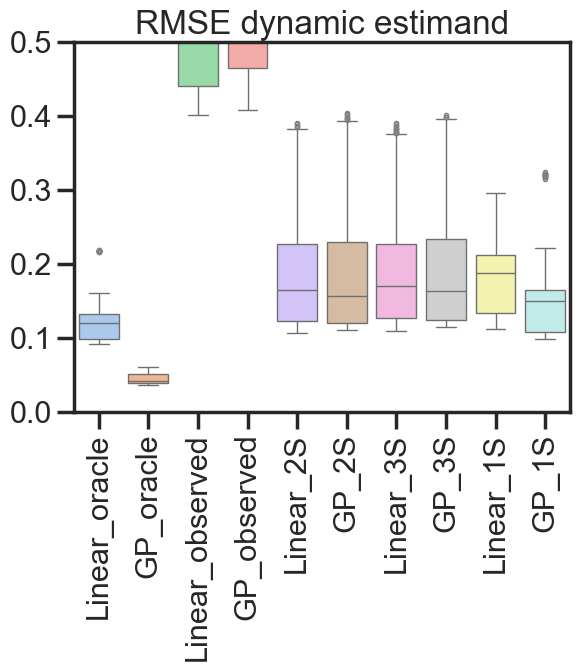

In [10]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE dynamic estimand")
plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

Text(0, 0.5, '')

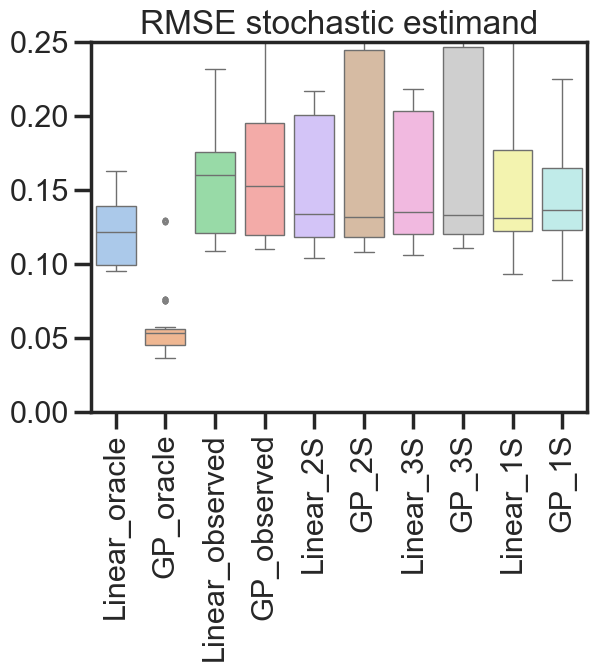

In [11]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE stochastic estimand")
plt.ylim(0,.25)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

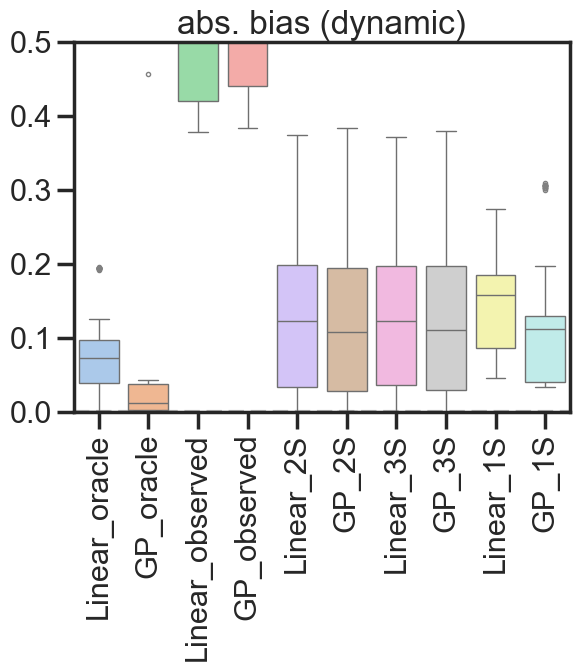

In [12]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (dynamic)")
plt.ylim(0,.5)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

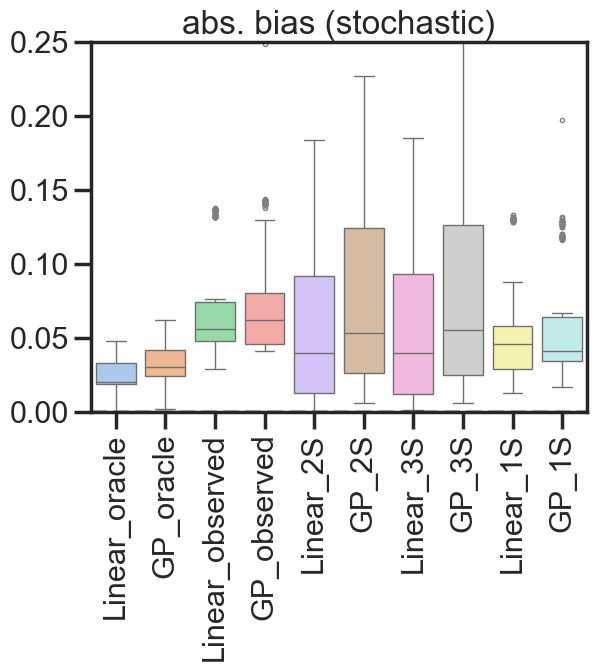

In [39]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (stochastic)")
plt.ylim(0,.25)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

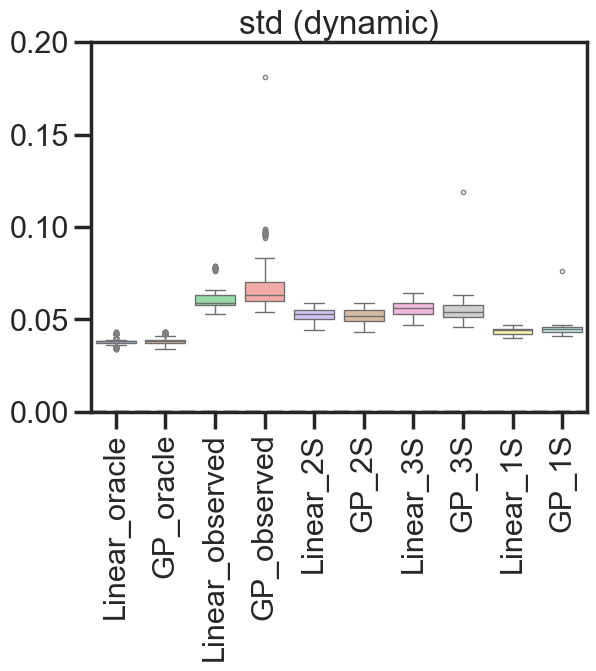

In [40]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (dynamic)")
plt.ylim(0,.2)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

Text(0, 0.5, '')

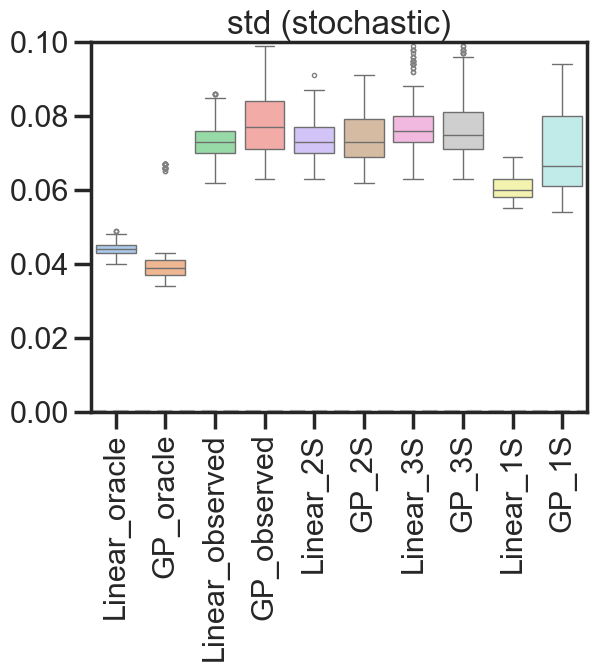

In [30]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (stochastic)")
plt.ylim(0,.1)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")